### Week 2 HW

In [1]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [2]:
class pois_gamma():
    def __init__(self, prior, data):
        self.alpha, self.beta = prior
        self.n = len(data)
        self.y_tot = sum(data)
        self.alpha_new = self.alpha + self.y_tot
        self.beta_new = self.beta + self.n
    
    def get_posterior(self):
        return st.gamma(self.alpha_new, scale = 1 / (self.beta_new))    
    
    def get_mean(self):
        return self.alpha_new / self.beta_new
    
    def get_variance(self):
        return self.alpha_new / (self.beta_new)**2
    
    def get_95q_CI(self):
        return (gamma.ppf(0.025, self.alpha_new, scale = 1 / (self.beta_new)), 
                gamma.ppf(0.975, self.alpha_new, scale = 1 / (self.beta_new)) )  
    
    def plot_result(self, const = (10**(280))):
        def pois_likelihood( theta, n, sy):
            return (theta**sy)*np.exp(-n*theta) #/ math.factorial(n)
        thetas = np.linspace(0.001, 18, 300)
        plt.figure(figsize = (8,6))
        plt.style.use('ggplot')
        plt.plot(thetas, st.gamma(self.alpha, scale = 1/self.beta).pdf(thetas), label='Prior', c='blue')
        plt.plot(thetas, const*pois_likelihood(thetas, self.n, self.y_tot), label='A Likelihood', c='orange')
        plt.plot(thetas, self.get_posterior().pdf(thetas), label='A Posterior', c='red')
        plt.xlabel(r'$\theta$', fontsize=14)
        plt.ylabel('Density', fontsize=16)
        plt.legend();
        
    def display_result(self, const = (10**(-280)) ):
        print("Posterior Mean: ", self.get_mean(), "\nPosterior Variance:", self.get_variance(), 
         "\n95 quantile Interval: ", self.get_95q_CI())
        self.plot_result(const)

#### Problem 1

#### a

In [3]:
# Input
# Prior
prior_A = (120, 10)
prior_B = (12, 1)

# Data
y_A = [12, 9, 12, 14, 13, 13, 15, 8, 15, 6]
y_B = [11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7]

# Posterior
post_A = pois_gamma(prior_A, y_A)
post_B = pois_gamma(prior_B, y_B)

Posterior Mean:  11.85 
Posterior Variance: 0.5925 
95 quantile Interval:  (10.389238190941795, 13.405448325642006)


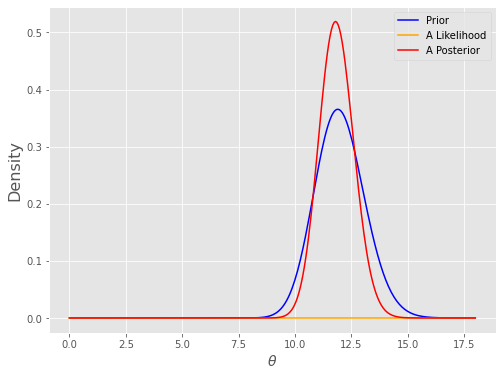

In [4]:
# Posterior result for Data A
post_A.display_result()

Posterior Mean:  8.928571428571429 
Posterior Variance: 0.6377551020408163 
95 quantile Interval:  (7.432064219464302, 10.560308149242363)


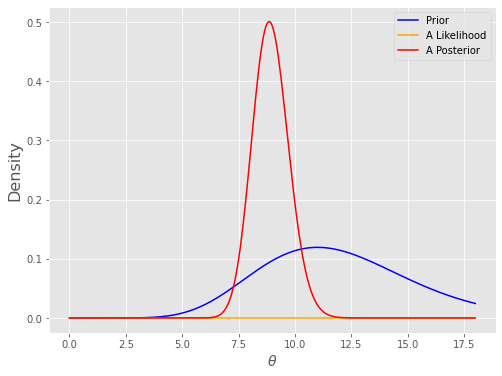

In [5]:
# Posterior result for Data B
post_B.display_result()

#### b

In [6]:
# posterior mean
n0 = np.linspace(1, 50, dtype = np.int)
posterior_means = []
prior_weights = []
for n in n0:
    prior = (12*n, n)
    post = pois_gamma( prior, y_B  )
    posterior_means.append(post.get_mean())
    prior_weights.append( n /  (n+len(y_B)) )

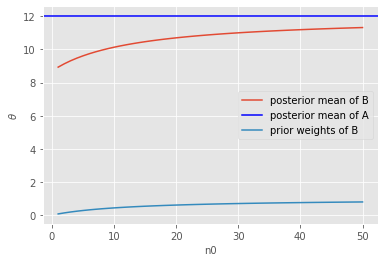

In [7]:
# show result
plt.figure(figsize = (6,4))
plt.plot(n0, posterior_means, label = 'posterior mean of B')
plt.axhline(y = 12, color = 'b', linestyle = '-', label = 'posterior mean of A')
plt.plot(n0, prior_weights, label = 'prior weights of B')
plt.ylabel(r'$\theta$', fontsize=10)
plt.xlabel('n0', fontsize=10)
plt.legend()

In [8]:
posterior_means[-1]

11.317460317460318

- n0 = 50 인 경우 posterior mean 이 11.32 정도로 12에 가장 가깝다. 
- prior mean 이 data 에 비해 posterior 영향을 주는 정도가 더 커질 수록 y_A 의 평균인 12에 가까워질 것이다.
- 어느 경우에나 prior mean 은 12 로 고정돼있으나 prior weight 는 beta 값 (n0) 가 증가할 수록 커진다. (alpha 값과는 무관)
- 즉 beta 가 큰 (따라서 variance 가 작은) strong prior 가 요구된다. 

#### c

- prior belief of A 가 prior belief of B 에 영향을 줄 수는 있을거 같다.. 근데 결국 중요한건 beta값인듯. b번 예제에서 보았듯이 A 와 B 의 prior mean 은 같았는데, beta 값에 따라 영향을 받는 정도가 달랐다. 만약 B의 beta 값에 영향을 주는 정보가 있으면 충분히 영향을 줄 수 있음.

- related 라는 정보가 있지만 그 정도가 얼마인지 측정해야할거같음.. How?

- ++ A, B가 독립 => Product Distribution 을 따르게 된다. (Gamma 분포가 아님)
- 손 계산... 결합 밀도 = 주변밀도1 * 주변밀도2 ??

### Problem 2

In [10]:
from IPython.display import Image

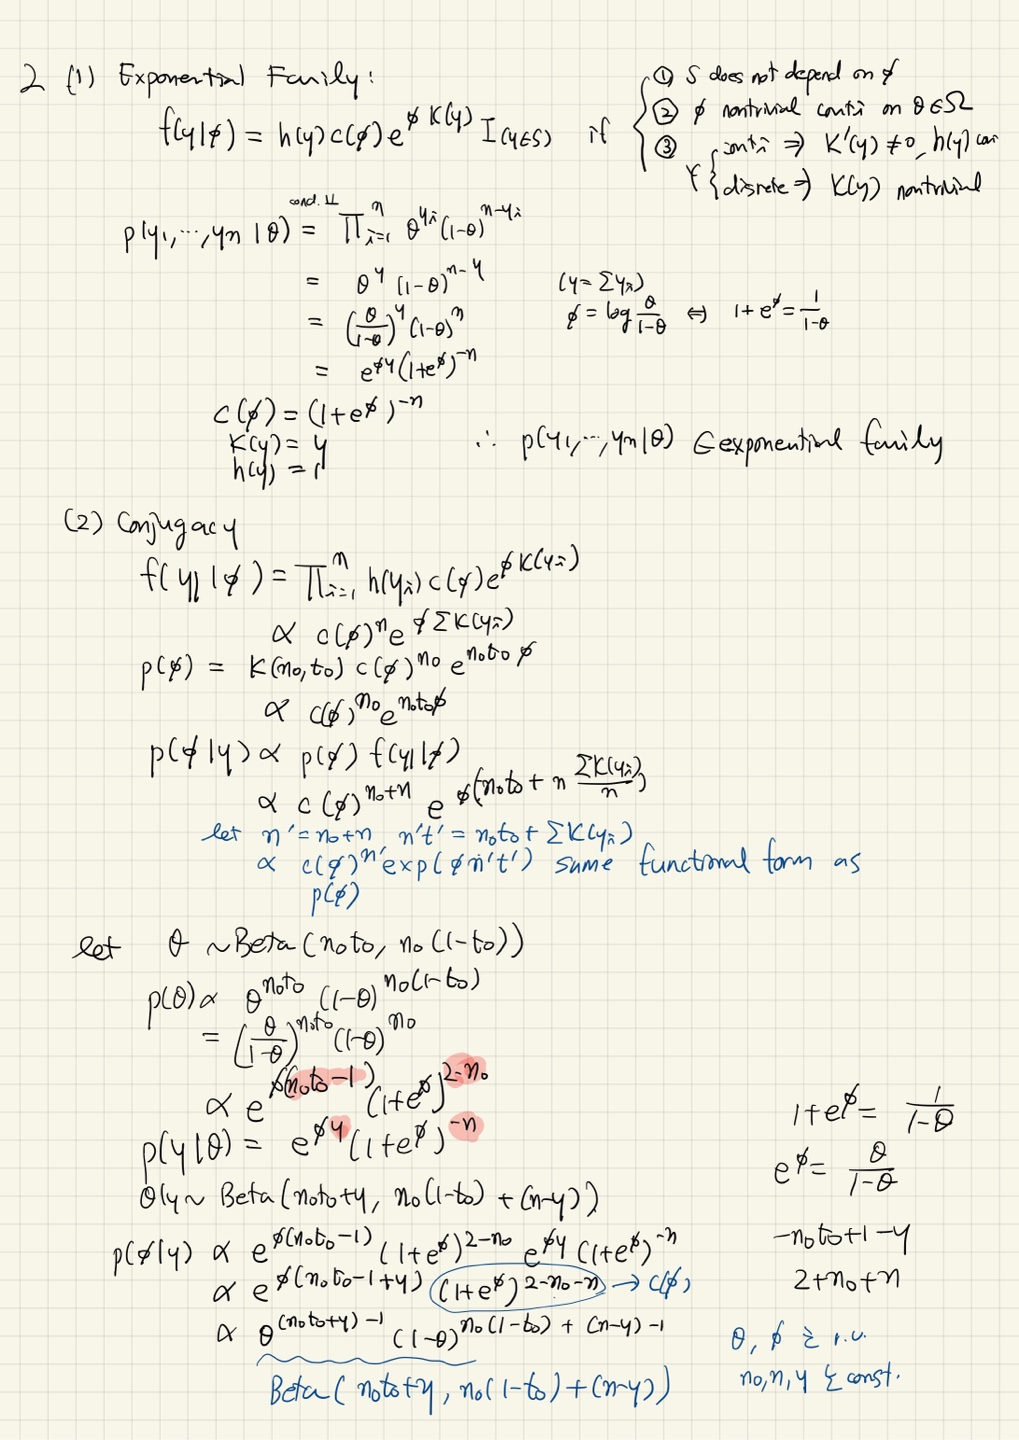

In [11]:
Image('./ESC_HW2_P2.jpg')

### Problem 3

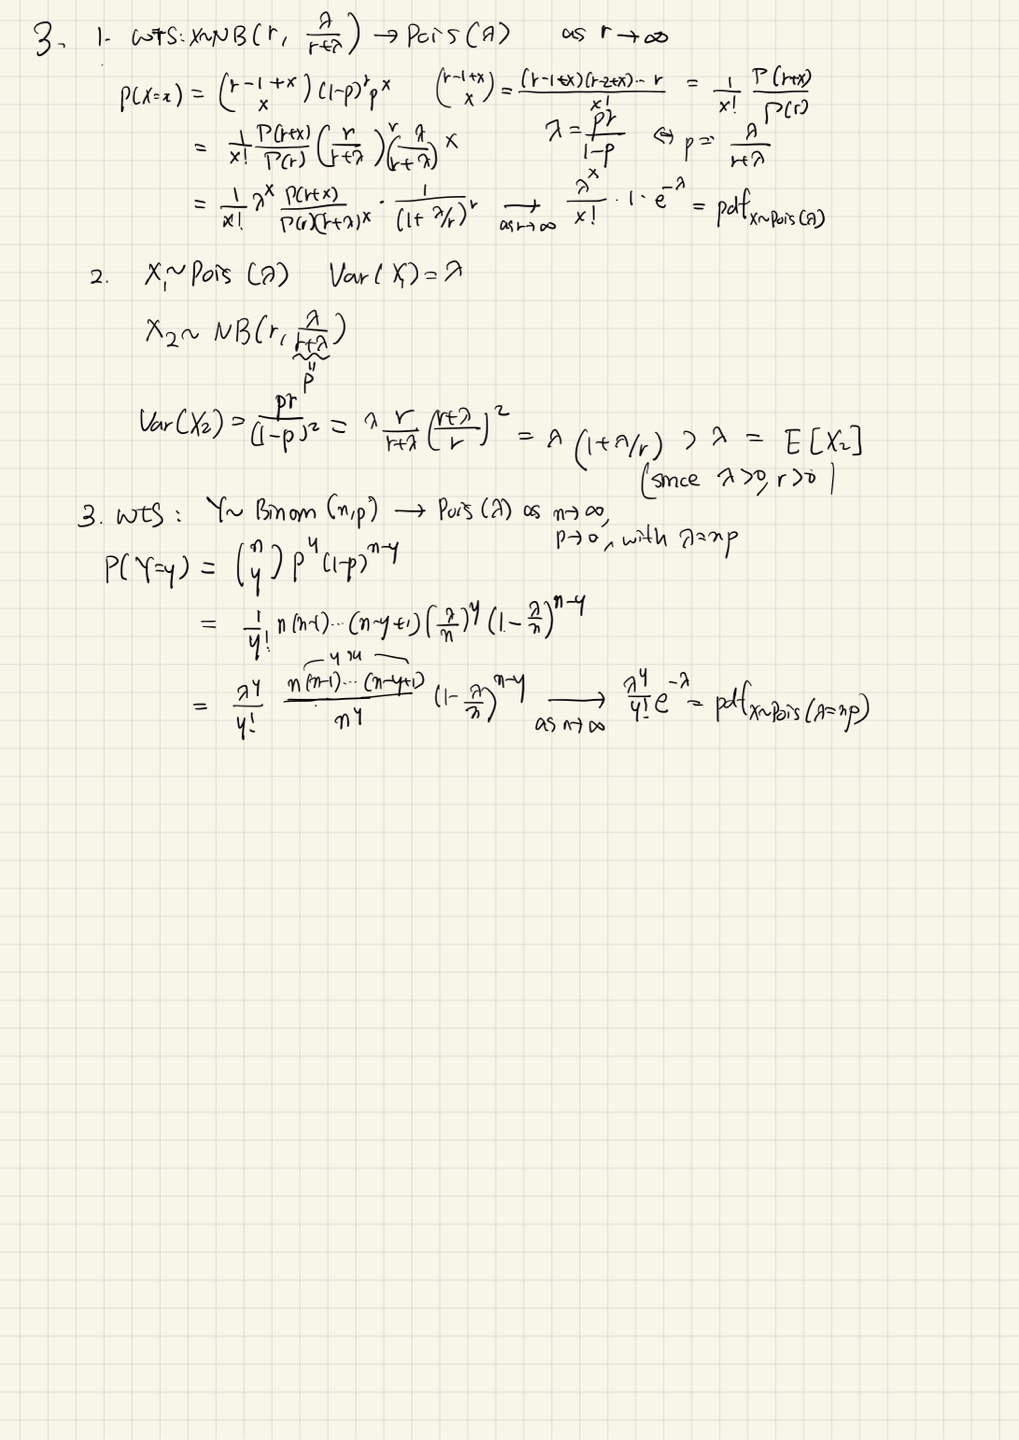

In [12]:
Image('./ESC_HW2_P3.jpg')